# Automatic Tracing Options

In [1]:
%matplotlib inline

from pathlib import Path
from zipfile import ZipFile

from astropy.visualization import simple_norm
from astropy.utils.data import download_file

from jwst import datamodels

from specreduce.tracing import KosmosTrace
from specreduce.background import Background

import tempfile

import numpy as np

import matplotlib.pyplot as plt

## Ingest s2d data

In [2]:
# data is taken from s2d file. x1d is used for comparison with pipeline extraction.
zipped_datapath = Path(download_file('https://stsci.box.com/shared/static/qdj79y7rv99wuui2hot0l3kg5ohq0ah9.zip', cache=True))

data_dir = Path(tempfile.gettempdir())

with ZipFile(zipped_datapath, 'r') as sample_data_zip:
    sample_data_zip.extractall(data_dir)

s2dfile = str(data_dir / "nirspec_fssim_d1_s2d.fits")
x1dfile = str(data_dir / "nirspec_fssim_d1_x1d.fits")

In [3]:
# use a jwst datamodel to provide a good interface to the data and wcs info
s2d = datamodels.open(s2dfile)
image = s2d.slits[0].data
norm_data = simple_norm(image, "sqrt")

## Background Extraction

In [4]:
# extraction parameters based on image above
ext_center = 27
ext_width = 4

bkg_sep = 4
bkg_width = 2

In [5]:
bg = Background.two_sided(image, ext_center, bkg_sep, width=bkg_width)

## Automatic Traces

Now we'll compare the trace when passing various options to `peak_method` and `window`.

In [14]:
auto_trace = KosmosTrace(image-bg, guess=ext_center)

Text(0.5, 1.0, 'slit[0] slice')

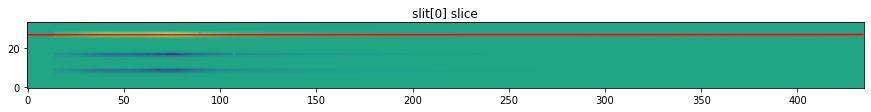

In [16]:
plt.figure(figsize=(15, 15))
plt.imshow(bg.sub_image(image), norm=norm_data, origin="lower")
plt.plot(auto_trace.trace, color='r')
plt.title("slit[0] slice")

In [17]:
auto_trace_window = KosmosTrace(image-bg, guess=ext_center, window=4)

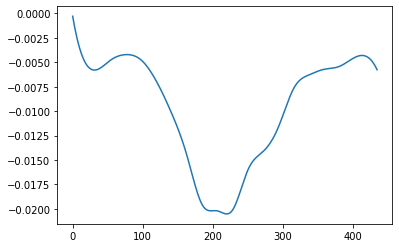

In [18]:
plt.plot(auto_trace.trace-auto_trace_window.trace)

In [8]:
auto_trace_max = KosmosTrace(image-bg, guess=ext_center, peak_method='max')

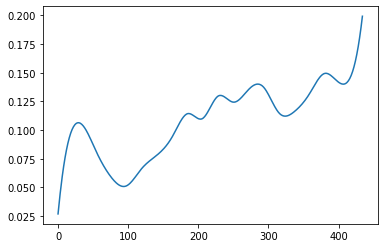

In [10]:
plt.plot(auto_trace.trace-auto_trace_max.trace)

In [11]:
auto_trace_centroid = KosmosTrace(image-bg, guess=ext_center, peak_method='centroid', window=4)

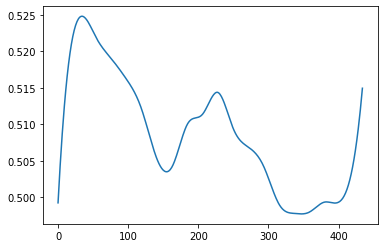

In [12]:
plt.plot(auto_trace.trace-auto_trace_centroid.trace)

## About this notebook

**Author:** Kyle Conroy, JWST
**Updated On:** 2022-07-14

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 